#### What is PCA?
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variance as possible in the dataset. It transforms the original variables into a new set of uncorrelated variables called principal components, ordered by the amount of variance they explain. The primary goals of PCA include:

- Reducing Dimensionality: Simplifying datasets while retaining their essential features, which can improve the performance of machine learning algorithms and visualization.
- Feature Extraction: Identifying and extracting the most significant features that contribute to the variance in the data.
- Data Visualization: Facilitating the visualization of high-dimensional data by reducing it to 2 or 3 dimensions.

#### Generating Random Data for PCA
Here’s how to create random data suitable for PCA:

Shape of the dataset: (100, 5)


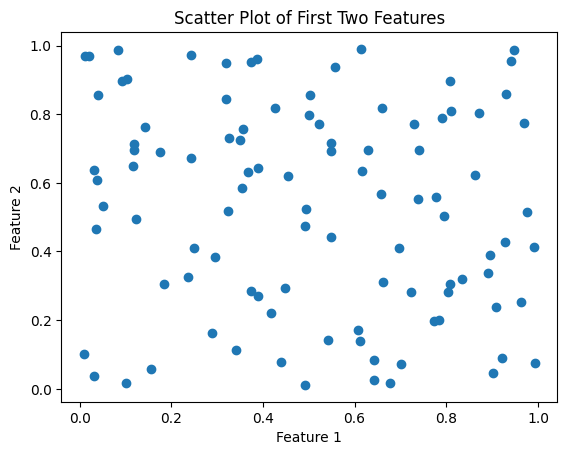

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
n_samples = 100
n_features = 5

# Create a random dataset
X = np.random.rand(n_samples, n_features)

# Display the shape of the dataset
print("Shape of the dataset:", X.shape)

# Plot the first two features
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of First Two Features')
plt.show()


#### Implementing PCA from Scratch Using NumPy
Here’s a simple implementation of PCA using NumPy:

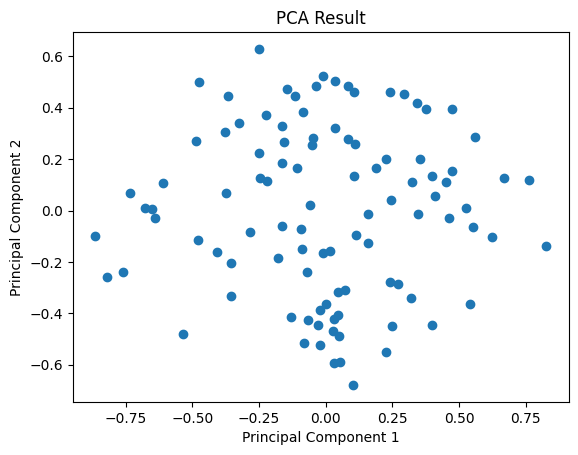

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        # Step 1: Standardize the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Calculate the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Step 4: Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_indices]
        self.components = eigenvectors[:, sorted_indices][:, :self.n_components]

    def transform(self, X):
        # Project the data onto the principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

# Example usage
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

# Plot the reduced data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


#### When to Use PCA
- Dimensionality Reduction: When you have a high-dimensional dataset and want to reduce the number of features while retaining variance.
- Data Visualization: When you want to visualize data in 2D or 3D, making it easier to spot patterns and relationships.
- Noise Reduction: PCA can help filter out noise from the data, focusing on the most important variations.
- Feature Engineering: PCA can be used to create new features based on the most important directions of variance in the data.

#### When Not to Use PCA
- Interpretability: PCA transforms the original features into new ones, which may make it harder to interpret the results and understand the relationships in the data.
- Non-linear Relationships: PCA is a linear technique, so it may not perform well on datasets with complex non-linear relationships. In such cases, other techniques like t-SNE or kernel PCA might be more appropriate.
- Sparse Data: PCA can struggle with high-dimensional sparse data, as it may not capture the underlying structure effectively.
- Outliers: PCA is sensitive to outliers, which can distort the direction of the principal components.
